## Section 1: Data Preprocessing

### Classification Project - to predict the probability of cancelling the booking

### Import and load the dataset

In [1]:
#Load necessary libraries
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [2]:
uploaded = files.upload()

Saving CourseData.csv to CourseData.csv


In [3]:
data = pd.read_csv("CourseData.csv")
data.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [5]:
#Number of rows and columns in the dataset
print("Row count:" + format(data.shape[0]))
print("Column count:" + format(data.shape[1]))

Row count:36275
Column count:19


In [6]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
#Display the row with Maximum number of Previous Booking Cancellations
data.iloc[data["no_of_previous_cancellations"].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [8]:
data.iloc[data["no_of_previous_cancellations"].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [9]:
#Display the row with Highest Average Price per Room
data.iloc[data["avg_price_per_room"].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [10]:
#Display the row with Lowest Average Price per Room
data.iloc[data["avg_price_per_room"].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

### Dealing with missing values

In [11]:
#Checking if the dataset has any null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
data.isnull().values.any()

False

### Dealing with duplicates

In [13]:
#Checking for duplicates within the dataset
data.duplicated().sum()

0

### Visualization


Visualizing the data with a few bar and pie graphs

In [14]:
#Visualization
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [15]:
#Bar Chart to display the children count in this dataset
count_of_children = data["no_of_children"].value_counts().sort_values(ascending = True)
count_of_children

10        1
9         2
3        19
2      1058
1      1618
0     33577
Name: no_of_children, dtype: int64

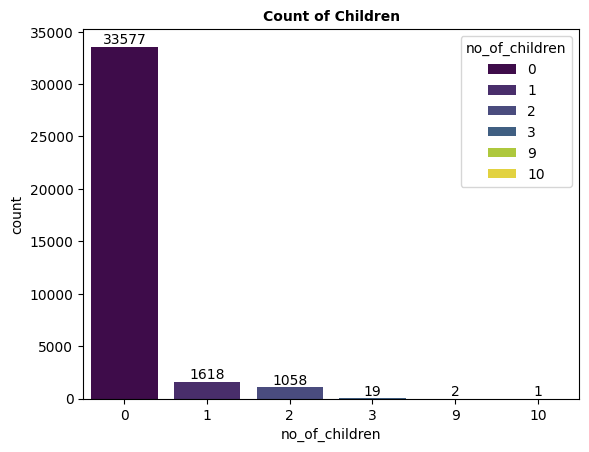

In [16]:
ax = sns.countplot(x = "no_of_children", data = data, hue = "no_of_children", palette = "viridis")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Count of Children", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

In [17]:
#Pie Chart Distribution of Meal Type Plan Chosen by Customers in this dataset
data["type_of_meal_plan"].value_counts().sort_values(ascending = True)

Meal Plan 3         5
Meal Plan 2      3305
Not Selected     5130
Meal Plan 1     27835
Name: type_of_meal_plan, dtype: int64

In [18]:
mealtypelabels = data["type_of_meal_plan"].unique()
mealtypelabels

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

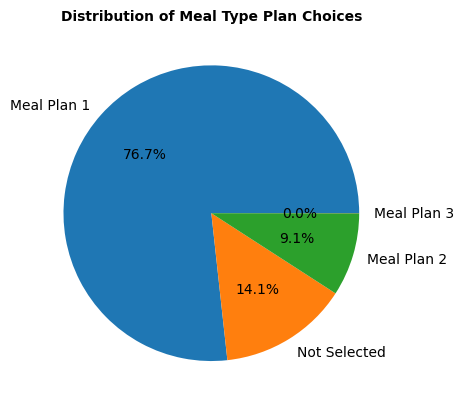

In [19]:
plt.pie(data= data, x = data["type_of_meal_plan"].value_counts(), labels=mealtypelabels, autopct = '%1.1f%%')
plt.title("Distribution of Meal Type Plan Choices", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

In [20]:
#Bar Chart - Room Type Reserved by Customers in this dataset
data["room_type_reserved"].value_counts().sort_values(ascending = False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

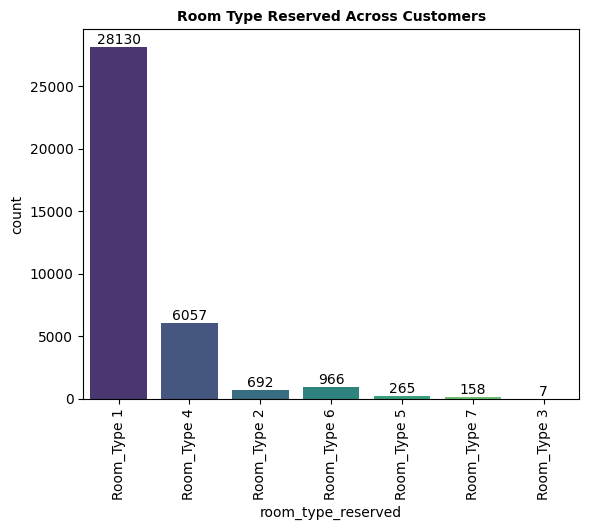

In [21]:
ax = sns.countplot(x = "room_type_reserved", data = data, hue = "room_type_reserved", palette = "viridis")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Room Type Reserved Across Customers", font = 'sans serif', color = 'black', weight = 'bold')
plt.xticks(rotation = 90)
plt.show()

In [22]:
#Bar Chart - Parking Space Requirement in this dataset
data["required_car_parking_space"].value_counts().sort_values(ascending = False)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

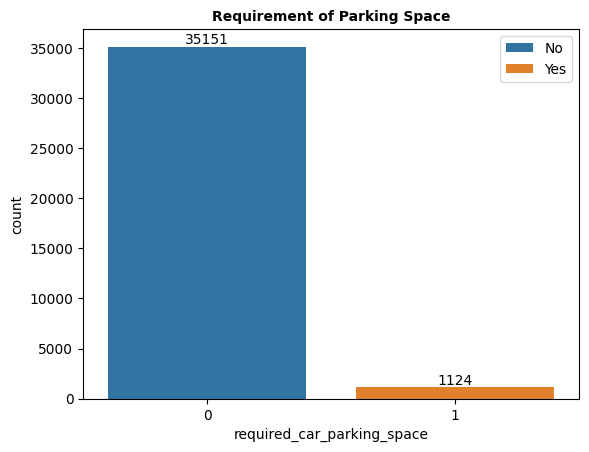

In [23]:
ax = sns.countplot(x = "required_car_parking_space", data = data, hue = "required_car_parking_space")
for label in ax.containers:
  ax.bar_label(label)
plt.title("Requirement of Parking Space", font = 'sans serif', color = 'black', weight = 'bold')
plt.legend(["No", "Yes"], loc = "upper right")
plt.show()

In [24]:
#Pie Chart to represent booking status across customers
data["booking_status"].value_counts().sort_values(ascending = False)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

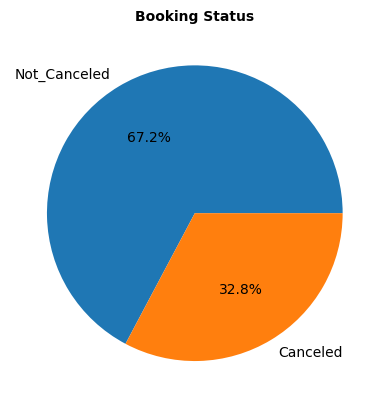

In [25]:
bookingstatus = data["booking_status"].unique()
plt.pie(data= data, x = data["booking_status"].value_counts(), labels=bookingstatus, autopct = '%1.1f%%')
plt.title("Booking Status", font = 'sans serif', color = 'black', weight = 'bold')
plt.show()

In [26]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
#Taking only the required columns from the main df and creating a newdf
newdata = data[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights",
             "type_of_meal_plan", "room_type_reserved", "no_of_previous_cancellations",
             "avg_price_per_room", "booking_status"
             ]]
newdata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,0,65.00,Not_Canceled
1,2,0,2,3,Not Selected,Room_Type 1,0,106.68,Not_Canceled
2,1,0,2,1,Meal Plan 1,Room_Type 1,0,60.00,Canceled
3,2,0,0,2,Meal Plan 1,Room_Type 1,0,100.00,Canceled
4,2,0,1,1,Not Selected,Room_Type 1,0,94.50,Canceled


In [28]:
#Feature Engineering
sc = StandardScaler()
labelencoder = LabelEncoder()

In [29]:
#labelencoder used to convert the categorical columns into numerical columns
newdata["type_of_meal_plan"] = labelencoder.fit_transform(newdata["type_of_meal_plan"])
newdata["room_type_reserved"] = labelencoder.fit_transform(newdata["room_type_reserved"])
newdata["booking_status"] = labelencoder.fit_transform(newdata["booking_status"])
newdata.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,0,0,0,65.00,1
1,2,0,2,3,3,0,0,106.68,1
2,1,0,2,1,0,0,0,60.00,0
3,2,0,0,2,0,0,0,100.00,0
4,2,0,1,1,3,0,0,94.50,0


### Correlation matrix and heatmap

In [30]:
#Data Correlation wrt Booking Status
newdata.corr()["booking_status"].sort_values(ascending = True)

avg_price_per_room             -0.142569
no_of_week_nights              -0.092996
no_of_adults                   -0.086920
no_of_weekend_nights           -0.061563
no_of_children                 -0.033078
type_of_meal_plan              -0.026706
room_type_reserved             -0.022986
no_of_previous_cancellations    0.033728
booking_status                  1.000000
Name: booking_status, dtype: float64

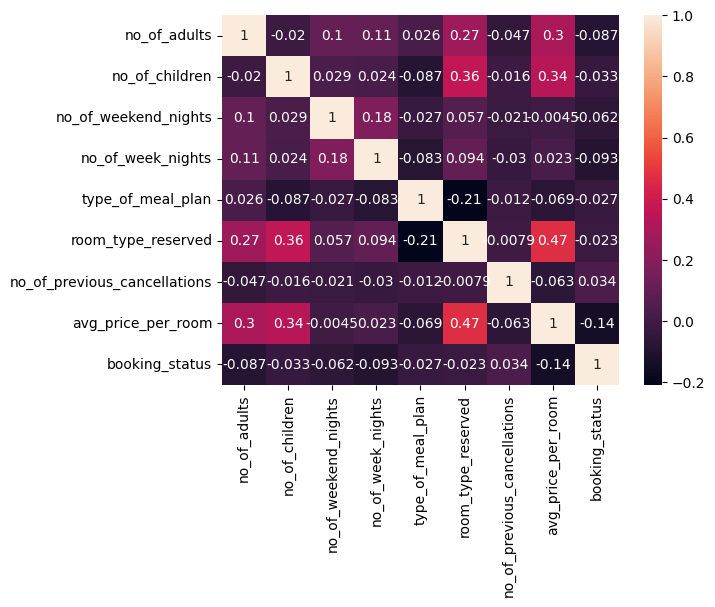

In [31]:
sns.heatmap(data = newdata.corr(), annot = True)
plt.show()

In [32]:
newdata.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'no_of_previous_cancellations', 'avg_price_per_room', 'booking_status'],
      dtype='object')

### Splitting the dataset into test and train sets

In [33]:
#Splitting the columns of the data into x and y
x = newdata[["no_of_adults", "no_of_children", "no_of_weekend_nights", "no_of_week_nights",
             "type_of_meal_plan", "room_type_reserved", "no_of_previous_cancellations",
             "avg_price_per_room"]]
y = newdata[["booking_status"]]

In [34]:
#Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

### Feature Scaling

In [35]:
#Scaling
sc_x_train = sc.fit_transform(x_train)
sc_x_test = sc.transform(x_test)

## Section 2: Building the Model

Machine Learning

We will split the dataset into test and train datasets. We will train our model using Logistic Regression, KNN Classifier Model and Random Forest Algorithm. We will check the accuracy scores of the model and then use the best performing model to test our data.

In [36]:
#Function to print the accuracy score of the models
def modelresults(predictions):
  print(f"Accuracy Score of the model is : {accuracy_score(y_test,predictions)}")

### 1) Logistic Regression Model

Logistic Regression Model

In [37]:
#First Model: Logistic Regression
log_model = LogisticRegression()
log_model.fit(sc_x_train, y_train)

LogisticRegression()

In [38]:
log_predictions = log_model.predict(sc_x_test)
modelresults(log_predictions)

Accuracy Score of the model is : 0.6683666436940041


### 2) KNN Classifier Model

KNN Classifier Model

In [39]:
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [("knn", knn)])
param_grid = {"knn__n_neighbors" : k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv = 5, scoring = "accuracy")

cv_classifier.fit(sc_x_train, y_train)
print(cv_classifier.best_params_)

{'knn__n_neighbors': 3}


In [40]:
gridknn_predictions = cv_classifier.predict(sc_x_test)
modelresults(gridknn_predictions)

Accuracy Score of the model is : 0.7235010337698139


### 3) Random Forest Algorithm

Random Forest Algorithm Model

In [41]:
#Random Forest Algorithm
rfr_model = RandomForestClassifier()
n_estimators = [100, 150, 200, 250, 300]
max_features = ['auto','sqrt','log2']
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {"n_estimators": n_estimators, "max_features" : max_features,
                  "bootstrap" : bootstrap, "oob_score" : oob_score }
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)

grid_rfr.fit(sc_x_train, y_train.values.ravel())
print(grid_rfr.best_params_)

{'bootstrap': True, 'max_features': 'log2', 'n_estimators': 150, 'oob_score': True}


In [42]:
predrfr = grid_rfr.predict(sc_x_test)
modelresults(predrfr)

Accuracy Score of the model is : 0.7458304617505169


## Section 3: Predicting a single output

In [43]:
#Since the KNN had the best accuracy score, we will create a booking entry and predict the result
print(x.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       type_of_meal_plan  room_type_reserved  no_of_previous_cancellations  \
count       36275.000000        36275.000000                  36275.000000   
mean            0.515644            0.708890                      0.023349   
std             1.048131            1.399851 

In [49]:
#From the mean values we rounded off and took the values for new customerdata
customerdata = np.array([2,1,1,2,1,1,0,105])

In [57]:
#When we fitted the char to num values 1 = not cancelled and 0 = cancelled booking
def results(customer):
  predictions = grid_rfr.predict(sc.transform(customer.reshape(1,-1)))
  if predictions ==1:
    return "won't cancel the booking"
  else:
    return "will cancel the booking"

In [58]:
print("This customer {} according to the Random Forest Algorithm Model".format(results(customerdata)))

This customer won't cancel the booking according to the Random Forest Algorithm Model
